## Applying ML Algorithms

- Linear Regression
- Decision Tree Regressor
- KNN Regressor
- RandomForestRegressor
- Xgboost Regressor
- Hyperparameter Tuning

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [27]:
df.head()

,T,TM,Tm,H,VV,V,VM,PM 2.5
0,14.7,21.0,10.0,76.0,0.6,3.0,11.1,313.22
1,14.4,15.0,13.0,91.0,1.4,6.1,16.5,186.18
2,14.0,17.0,11.0,91.0,0.6,4.8,13.0,87.18
3,9.1,12.0,6.0,91.0,0.5,6.7,13.0,217.87
4,8.4,10.0,7.0,95.0,0.5,5.7,11.1,229.9


In [29]:
df.drop(index = 486, inplace = True)

In [28]:
df[480:488]

,T,TM,Tm,H,VV,V,VM,PM 2.5
480,27.8,32.3,26.2,92.0,2.7,10.0,18.3,17.24
481,29.3,31.5,27.0,82.0,3.1,10.2,18.3,27.56
482,30.1,34.1,26.4,76.0,3.7,15.7,22.2,27.29
483,29.4,34.0,26.0,84.0,2.9,5.6,14.8,57.42
484,30.2,34.0,26.6,83.0,2.6,5.2,18.3,36.58
485,29.2,32.0,27.0,91.0,2.4,2.0,16.5,50.42
486,30.9,35.4,26.6,70.0,3.9,12.6,18.3,""""""
487,31.5,36.0,27.0,67.0,4.0,9.8,14.8,26.54


In [30]:
df.head()

,T,TM,Tm,H,VV,V,VM,PM 2.5
0,14.7,21.0,10.0,76.0,0.6,3.0,11.1,313.22
1,14.4,15.0,13.0,91.0,1.4,6.1,16.5,186.18
2,14.0,17.0,11.0,91.0,0.6,4.8,13.0,87.18
3,9.1,12.0,6.0,91.0,0.5,6.7,13.0,217.87
4,8.4,10.0,7.0,95.0,0.5,5.7,11.1,229.9


In [32]:
df = df.dropna()

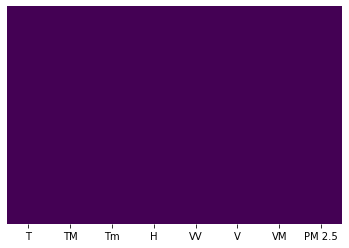

In [33]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df = df.dropna()

In [34]:
df.isnull().sum()

T         0
TM        0
Tm        0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [35]:
X = df.iloc[:,:-1] ## independent features
y = df.iloc[:,-1] ## dependent features

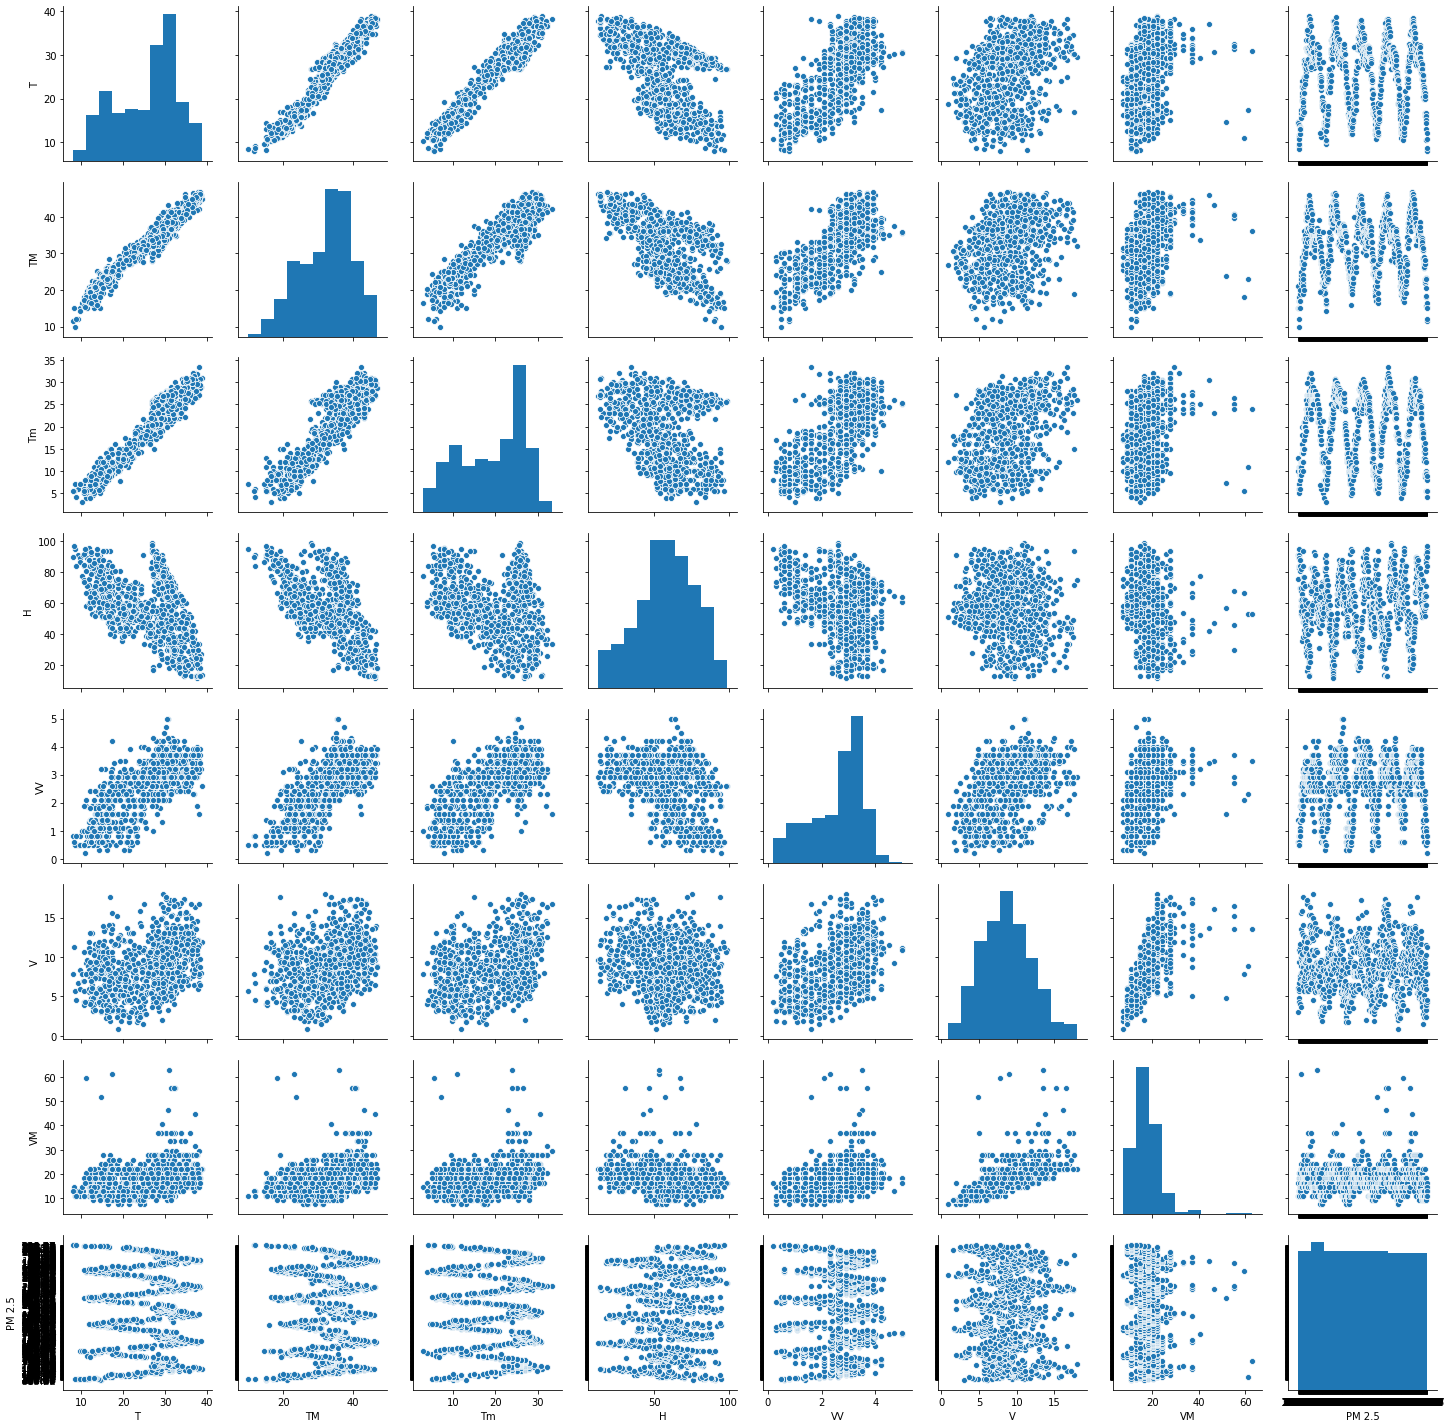

In [69]:
sns.pairplot(df)

In [36]:
df.corr()

,T,TM,Tm,H,VV,V,VM
T,1.000000,0.968031,0.959657,-0.461117,0.739863,0.344295,0.283157
TM,0.968031,1.000000,0.884027,-0.587916,0.722295,0.319561,0.307926
Tm,0.959657,0.884027,1.000000,-0.236288,0.698691,0.372665,0.268746
H,-0.461117,-0.587916,-0.236288,1.000000,-0.390737,-0.143525,-0.204506
VV,0.739863,0.722295,0.698691,-0.390737,1.000000,0.423150,0.331673
V,0.344295,0.319561,0.372665,-0.143525,0.423150,1.000000,0.627935
VM,0.283157,0.307926,0.268746,-0.204506,0.331673,0.627935,1.000000


## Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

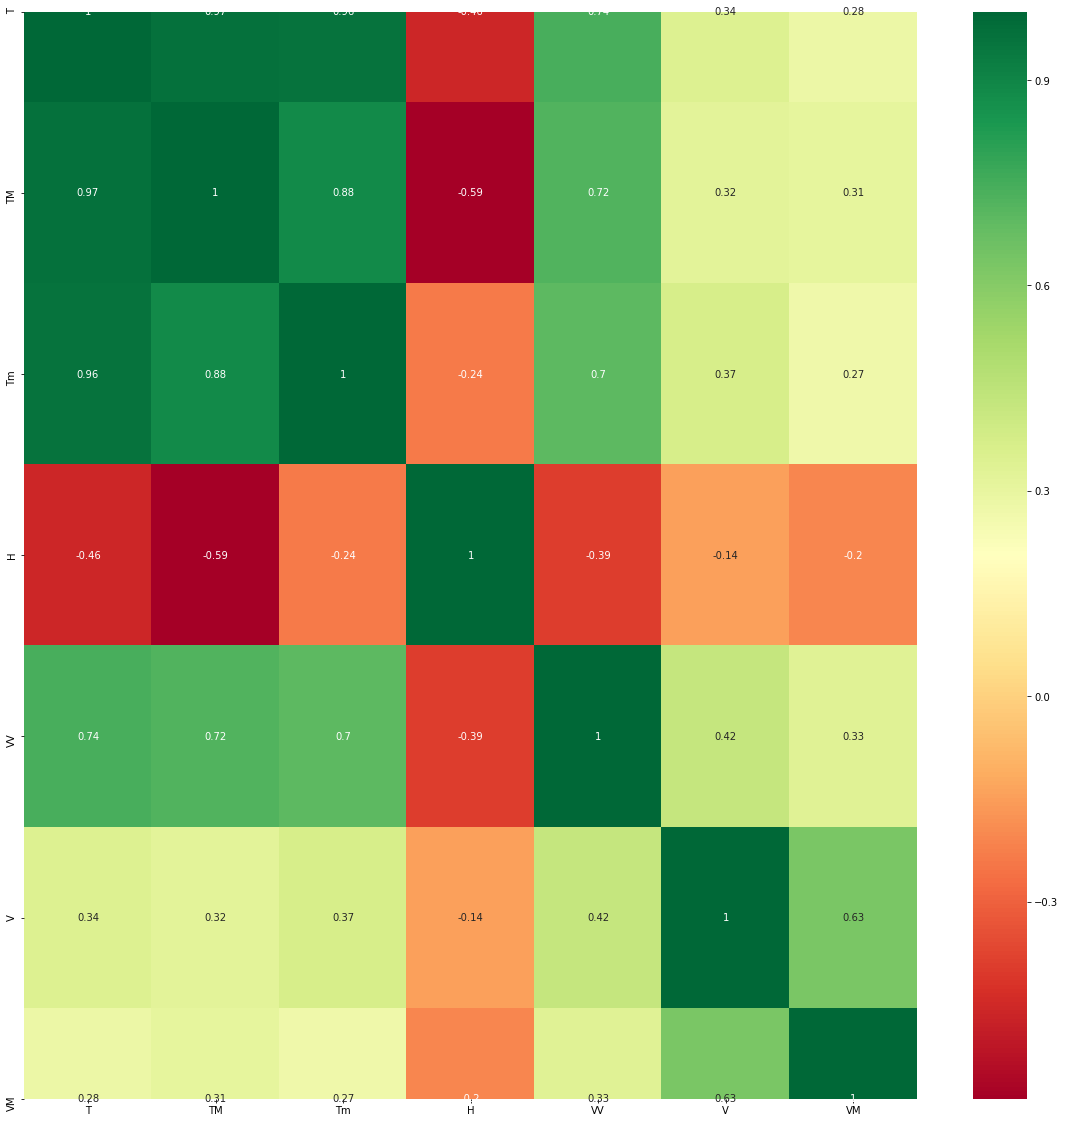

In [37]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Feature Importance

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [38]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [39]:
print(model.feature_importances_)

[0.13558844 0.07113259 0.15578633 0.11037552 0.38994559 0.09770711
 0.03946442]


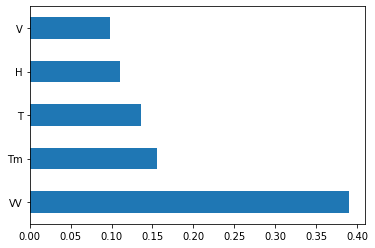

In [40]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Linear Regression

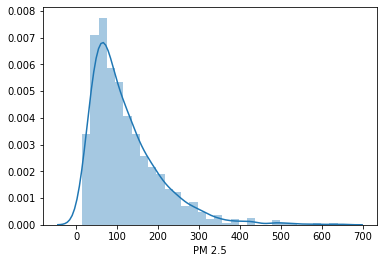

In [47]:
sns.distplot(y.astype(float))

### Train and Test split

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [51]:
regressor.coef_

array([  2.34179171,   1.51082672,  -4.43310973,  -1.07992635,
       -64.85186067,  -2.96410213,  -0.55475198])

In [52]:
regressor.intercept_

365.1078095613587

In [53]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.6363558020836261


In [54]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.6768772388365354


In [55]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [56]:
score.mean()

0.608517978019793

In [57]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,2.341792
TM,1.510827
Tm,-4.433110
H,-1.079926
VV,-64.851861
V,-2.964102
VM,-0.554752


In [58]:
prediction=regressor.predict(X_test)

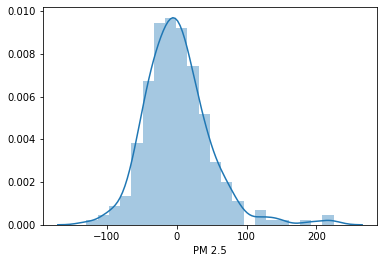

In [62]:
sns.distplot(y_test.astype(float) - prediction.astype(float))

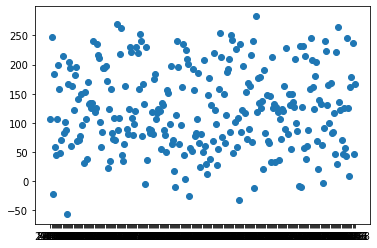

In [64]:
plt.scatter(y_test,prediction)

### Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.

In [65]:
from sklearn import metrics

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 34.5150033120822
MSE: 2253.557901682495
RMSE: 47.47165366492403


In [67]:
import pickle

In [68]:
# open a file, where you ant to store the data
file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)